In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
nypd = pd.read_csv('C:/NYPD_Complaint_Data_Historic.csv')

C:\Users\peekk\AppData\Local\Temp\ipykernel_16592\2532116499.py:1: DtypeWarning: Columns (0,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  nypd = pd.read_csv('C:/NYPD_Complaint_Data_Historic.csv')


In [ ]:
nypd.rename(columns = {'CMPLNT_NUM':'id', 'CMPLNT_FR_DT':'crime_date', 'CMPLNT_FR_TM': 'crime_datetime'
                       ,'ADDR_PCT_CD': 'precinct', 'RPT_DT': 'date_reported', 'KY_CD': 'offense_code'
                        ,'CRM_ATPT_CPTD_CD': 'succeeded_or_attempted', 'LAW_CAT_CD': 'level_of_offense'
                        , 'BORO_NM': 'borough_name' }, inplace = True)

In [ ]:
nypd_right = nypd[['id','crime_date','date_reported', 'OFNS_DESC',
              'succeeded_or_attempted', 'level_of_offense', 'borough_name', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
              'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']]

In [ ]:
nypd_right = nypd_right.fillna({'SUSP_AGE_GROUP' : 'UNKNOWN',
                      'SUSP_RACE': 'UNKNOWN',
                      'SUSP_SEX': 'UNKNOWN',
                      'VIC_AGE_GROUP': 'UNKNOWN',
                      })

In [ ]:
nypd_right['crime_date'] = pd.to_datetime(nypd_right['crime_date'], errors='coerce')
nypd_right['date_reported'] = pd.to_datetime(nypd_right['date_reported'], errors='coerce')

In [ ]:
nypd_right.head()

,id,crime_date,date_reported,OFNS_DESC,succeeded_or_attempted,level_of_offense,borough_name,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,469069650,09/04/2019,09/04/2019,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,NaN,NaN,NaN,25-44,BLACK,F
1,629841380,08/31/2019,08/31/2019,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,NaN,NaN,NaN,45-64,UNKNOWN,M
2,918597562,08/31/2007,09/04/2007,BURGLARY,COMPLETED,FELONY,MANHATTAN,NaN,NaN,NaN,NaN,UNKNOWN,D
3,224389328,09/07/2019,09/07/2019,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,BLACK,M,UNKNOWN,UNKNOWN,D
4,303540290,02/05/2015,02/05/2015,BURGLARY,COMPLETED,FELONY,BROOKLYN,NaN,UNKNOWN,U,NaN,UNKNOWN,D


In [ ]:
nypd_copy = nypd_right.copy()

In [ ]:
nypd_copy['crime_datetime'] = pd.to_datetime(nypd_copy['crime_datetime'], format='%H:%M:%S') 
nypd_copy.head()

,id,crime_date,crime_datetime,date_reported,offense_code,OFNS_DESC,succeeded_or_attempted,level_of_offense,borough_name,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,469069650,2019-09-04,2019-09-04 09:00:00,2019-09-04,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,UNKNOWN,UNKNOWN,25-44,BLACK,F
1,629841380,2019-08-31,2019-08-31 18:58:00,2019-08-31,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,UNKNOWN,UNKNOWN,UNKNOWN,45-64,UNKNOWN,M
2,918597562,2007-08-31,2007-08-31 17:00:00,2007-09-04,107,BURGLARY,COMPLETED,FELONY,MANHATTAN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,D
3,224389328,2019-09-07,2019-09-07 22:00:00,2019-09-07,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,BLACK,M,UNKNOWN,UNKNOWN,D
4,303540290,2015-02-05,2015-02-05 13:55:00,2015-02-05,107,BURGLARY,COMPLETED,FELONY,BROOKLYN,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,D


In [ ]:
level_top = nypd_right.groupby('level_of_offense',as_index=False)\
.agg({'id':'count'})\
.sort_values('id', ascending=False)
level_top

,level_of_offense,id
1,MISDEMEANOR,4635298
0,FELONY,2602491
2,VIOLATION,1119478


In [ ]:
offense_type_top = nypd_right.groupby('OFNS_DESC',as_index=False)\
.agg({'id':'count'})\
.sort_values('id', ascending=False).head(10)
offense_type_top

,OFNS_DESC,id
60,PETIT LARCENY,1446723
30,HARRASSMENT 2,1103125
8,ASSAULT 3 & RELATED OFFENSES,877602
13,CRIMINAL MISCHIEF & RELATED OF,834406
28,GRAND LARCENY,731421
15,DANGEROUS DRUGS,443473
48,OFF. AGNST PUB ORD SENSBLTY &,419214
21,FELONY ASSAULT,334975
65,ROBBERY,297692
10,BURGLARY,282842


In [ ]:
neighbourhood_top = nypd_right.groupby('borough_name',as_index=False)\
.agg({'id':'count'})\
.sort_values('id', ascending=False).head()
neighbourhood_top

,borough_name,id
2,BROOKLYN,2460616
3,MANHATTAN,2015653
1,BRONX,1806245
4,QUEENS,1676748
5,STATEN ISLAND,384550


In [ ]:
victim_top = nypd_right.groupby('VIC_RACE',as_index=False)\
.agg({'id':'count'})\
.query('VIC_RACE != "UNKNOWN"')\
.sort_values('id', ascending=False).head(6)
victim_top

,VIC_RACE,id
3,BLACK,2019507
7,WHITE,1413797
8,WHITE HISPANIC,1366282
2,ASIAN / PACIFIC ISLANDER,507507
4,BLACK HISPANIC,292194
1,AMERICAN INDIAN/ALASKAN NATIVE,37048


In [ ]:
susp_top = nypd_right.groupby('SUSP_RACE',as_index=False)\
.agg({'id':'count'})\
.query('SUSP_RACE != "UNKNOWN"')\
.sort_values('id', ascending=False).head()
susp_top

,SUSP_RACE,id
3,BLACK,1758316
8,WHITE HISPANIC,795144
7,WHITE,501763
4,BLACK HISPANIC,243787
2,ASIAN / PACIFIC ISLANDER,154972


In [ ]:
top_tries = nypd_right.groupby('succeeded_or_attempted',as_index=False)\
.agg({'id':'count'})\
.sort_values('id', ascending=False)
top_tries

,succeeded_or_attempted,id
1,COMPLETED,8217032
0,ATTEMPTED,140067


Text(0.5, 1.0, 'Reported Crimes')

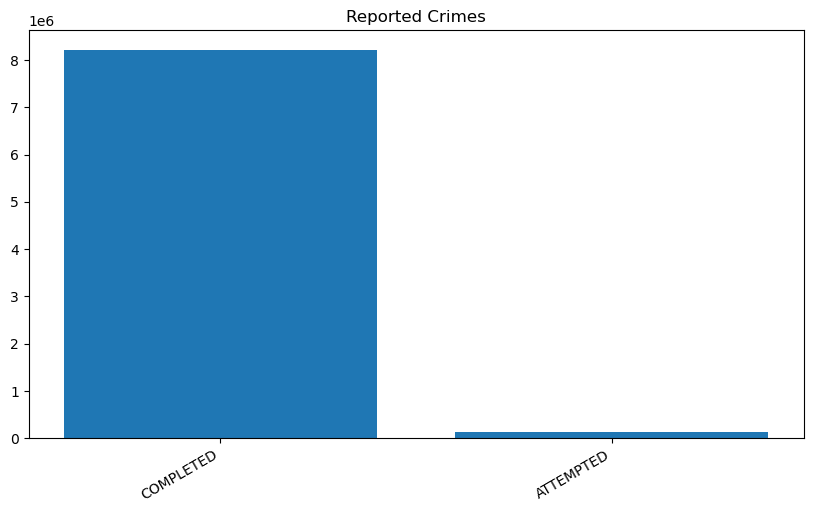

In [ ]:
fig,ax = plt.subplots(1,figsize=(10,6))
fig.autofmt_xdate()
plt.bar(top_tries['succeeded_or_attempted'], top_tries['id'])
plt.title('Reported Crimes')

Text(0.5, 1.0, 'Suspected Race')

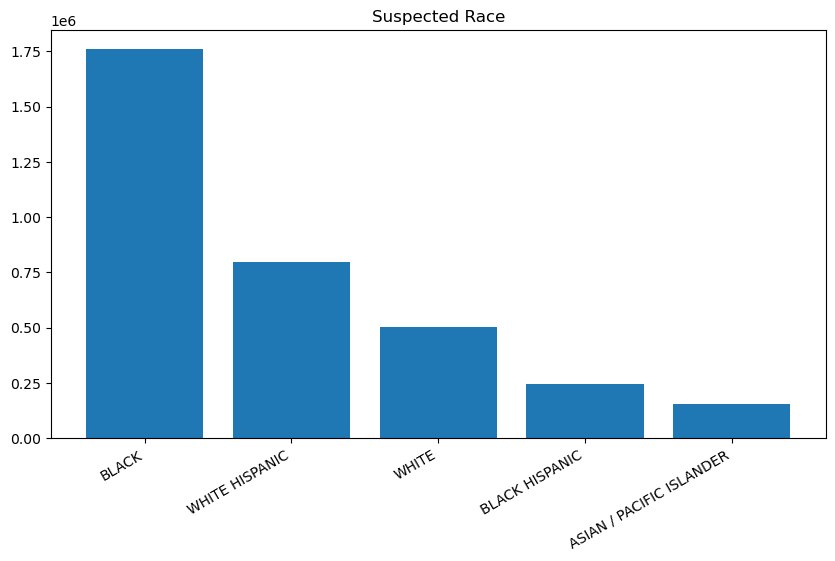

In [ ]:
fig,ax = plt.subplots(1,figsize=(10,6))
fig.autofmt_xdate()
plt.bar(susp_top['SUSP_RACE'], susp_top['id'])
plt.title('Suspected Race')

Text(0.5, 1.0, 'Victim Race')

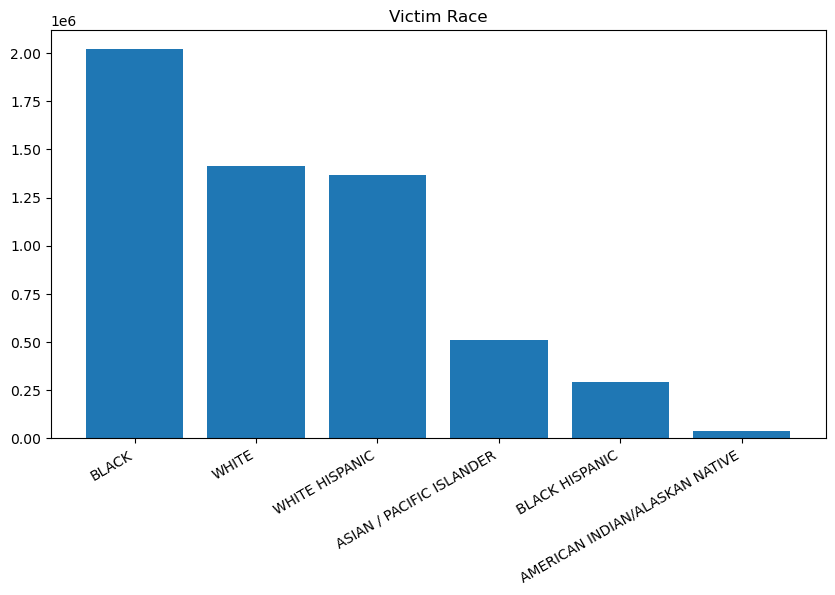

In [ ]:
fig,ax = plt.subplots(1,figsize=(10,6))
fig.autofmt_xdate()
plt.bar(victim_top['VIC_RACE'], victim_top['id'])
plt.title('Victim Race')